First, make sure you can load, read and show an image from the dataset.

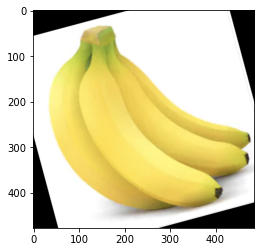

In [1]:
%matplotlib inline
# The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
# ~ thank you Ritu dhoot (https://stackoverflow.com/a/53079880)
import cv2 as cv
from matplotlib import pyplot as plt

#Import image
image = cv.imread("./dataset/train/freshbanana/rotated_by_15_Screen Shot 2018-06-12 at 9.41.57 PM.png")

#Show the image with matplotlib
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.show()

Try to isolate this apple, let's remove the background using GrabCut algorithm.

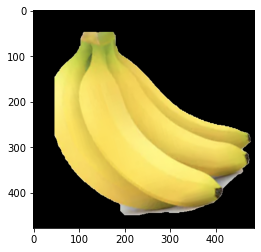

In [3]:
%matplotlib inline
# The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook
# ~ thank you Ritu dhoot (https://stackoverflow.com/a/53079880)
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

#Import image
image = cv.imread("./dataset/train/freshbanana/rotated_by_15_Screen Shot 2018-06-12 at 9.41.57 PM.png")

def grab(image):
    #Create a center of interest rectangle
    margin = .1
    (image_width, image_height, channels) = image.shape
    rect = (int(margin*image_width),int(margin*image_height),int((1-margin)*image_width),int((1-margin)*image_height))

    #Execute grab cut
    mask = np.zeros(image.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    cv.grabCut(image,mask,rect,bgdModel,fgdModel,3,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    return image*mask2[:,:,np.newaxis]

#Show the image with matplotlib
plt.imshow(cv.cvtColor(grab(image), cv.COLOR_BGR2RGB))
plt.show()

Now, let's compate fresh orange histograms vs rotten orange histograms.

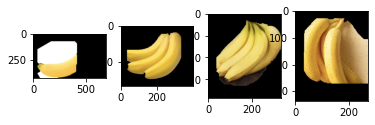

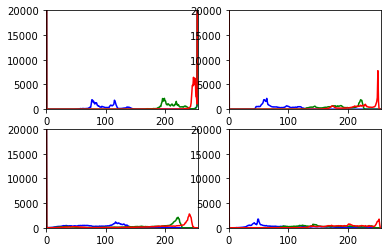

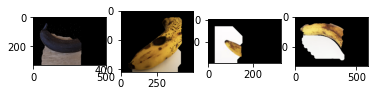

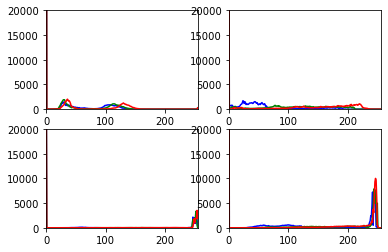

In [4]:
#Show histogram
color = ('b','g','r')
def show_hist(image):
    for i,col in enumerate(color):
        histr = cv.calcHist([image],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        plt.ylim([0,20000])

### FRESH BANANAS

#Import fresh banana images
image1 = grab(cv.imread("./dataset/test/freshbanana/rotated_by_30_Screen Shot 2018-06-12 at 9.54.02 PM.png"))
image2 = grab(cv.imread("./dataset/test/freshbanana/rotated_by_30_Screen Shot 2018-06-12 at 10.02.19 PM.png"))
image3 = grab(cv.imread("./dataset/test/freshbanana/vertical_flip_Screen Shot 2018-06-12 at 10.06.12 PM.png"))
image4 = grab(cv.imread("./dataset/test/freshbanana/saltandpepper_Screen Shot 2018-06-12 at 10.06.19 PM.png"))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
plt.show()

plt.subplot(221)
show_hist(image1)
plt.subplot(222)
show_hist(image2)
plt.subplot(223)
show_hist(image3)
plt.subplot(224)
show_hist(image4)
plt.show()

### ROTTEN BANANAS

#Import rotten banana images
image1 = grab(cv.imread("./dataset/test/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 9.18.07 PM.png"))
image2 = grab(cv.imread("./dataset/test/rottenbanana/vertical_flip_Screen Shot 2018-06-12 at 9.05.21 PM.png"))
image3 = grab(cv.imread("./dataset/test/rottenbanana/translation_Screen Shot 2018-06-12 at 9.01.56 PM.png"))
image4 = grab(cv.imread("./dataset/test/rottenbanana/Screen Shot 2018-06-12 at 8.48.40 PM.png"))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
plt.show()

plt.subplot(221)
show_hist(image1)
plt.subplot(222)
show_hist(image2)
plt.subplot(223)
show_hist(image3)
plt.subplot(224)
show_hist(image4)
plt.show()

Notice : looks like rotten orange have wider red and green histograms than fresh orange ones.

fresh image1 average 61.783923765989606
fresh image2 average 64.76849660082944
fresh image3 average 92.49672144550732
fresh image4 average 99.58063537796649


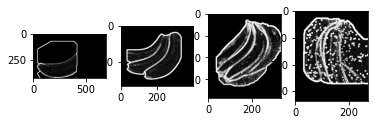

rotten image1 average 118.54827140073041
rotten image2 average 94.61918076496544
rotten image3 average 128.45345866033946
rotten image4 average 115.23138541217091


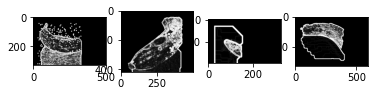

In [5]:
threshold = 1

def abs_dst(image):
    ddepth = cv.CV_16S
    kernel_size = 5
    window_name = "Laplace"
    # Remove noise by blurring with a Gaussian filter
    image_blur = cv.GaussianBlur(image, (3, 3), 0)
    # Convert the image to grayscale
    image_gray = cv.cvtColor(image_blur, cv.COLOR_BGR2GRAY)
    # Apply Laplace function
    dst = cv.Laplacian(image_gray, ddepth, ksize=kernel_size)
    # converting back to uint8
    return cv.convertScaleAbs(dst)

def get_score(image):
    arr = np.asarray(image).flatten()
    filter_arr = arr > threshold
    newarr = arr[filter_arr]
    return newarr.mean()

### FRESH ORANGES

#Import fresh orange images
image1 = abs_dst(grab(cv.imread("./dataset/test/freshbanana/rotated_by_30_Screen Shot 2018-06-12 at 9.54.02 PM.png")))
image2 = abs_dst(grab(cv.imread("./dataset/test/freshbanana/rotated_by_30_Screen Shot 2018-06-12 at 10.02.19 PM.png")))
image3 = abs_dst(grab(cv.imread("./dataset/test/freshbanana/vertical_flip_Screen Shot 2018-06-12 at 10.06.12 PM.png")))
image4 = abs_dst(grab(cv.imread("./dataset/test/freshbanana/saltandpepper_Screen Shot 2018-06-12 at 10.06.19 PM.png")))

print("fresh image1 average", get_score(image1))
print("fresh image2 average", get_score(image2))
print("fresh image3 average", get_score(image3))
print("fresh image4 average", get_score(image4))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
plt.show()

### ROTTEN ORANGES

#Import rotten orange images
image1 = abs_dst(grab(cv.imread("./dataset/test/rottenbanana/saltandpepper_Screen Shot 2018-06-12 at 9.18.07 PM.png")))
image2 = abs_dst(grab(cv.imread("./dataset/test/rottenbanana/vertical_flip_Screen Shot 2018-06-12 at 9.05.21 PM.png")))
image3 = abs_dst(grab(cv.imread("./dataset/test/rottenbanana/translation_Screen Shot 2018-06-12 at 9.01.56 PM.png")))
image4 = abs_dst(grab(cv.imread("./dataset/test/rottenbanana/Screen Shot 2018-06-12 at 8.48.40 PM.png")))

print("rotten image1 average", get_score(image1))
print("rotten image2 average", get_score(image2))
print("rotten image3 average", get_score(image3))
print("rotten image4 average", get_score(image4))

#Show images
plt.subplot(141)
plt.imshow(cv.cvtColor(image1, cv.COLOR_BGR2RGB))
plt.subplot(142)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.subplot(143)
plt.imshow(cv.cvtColor(image3, cv.COLOR_BGR2RGB))
plt.subplot(144)
plt.imshow(cv.cvtColor(image4, cv.COLOR_BGR2RGB))
plt.show()